In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [2]:
import pandas as pd

# Provide the correct path to your file
file_path = r"C:\Users\apoor\OneDrive\Desktop\datasci\combined_data - Copy.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())


        Date    Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0 1978-01-01  Day_1  1978      1    Loc_0                 1     27.25   
1 1978-01-02  Day_2  1978      1    Loc_0                 0     27.25   
2 1978-01-03  Day_3  1978      1    Loc_0                 0     27.25   
3 1978-01-04  Day_4  1978      1    Loc_0                 0     27.25   
4 1978-01-05  Day_5  1978      1    Loc_0                 0     27.25   

   Longitude  Quarter  
0      88.25        1  
1      88.25        1  
2      88.25        1  
3      88.25        1  
4      88.25        1  


In [3]:
data.shape

(85679, 9)

In [4]:
data['class'] = data['Rainfall (in mm)'].apply(lambda x : 1 if x > 0 else 0)
data.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,class
0,1978-01-01,Day_1,1978,1,Loc_0,1,27.25,88.25,1,1
1,1978-01-02,Day_2,1978,1,Loc_0,0,27.25,88.25,1,0
2,1978-01-03,Day_3,1978,1,Loc_0,0,27.25,88.25,1,0
3,1978-01-04,Day_4,1978,1,Loc_0,0,27.25,88.25,1,0
4,1978-01-05,Day_5,1978,1,Loc_0,0,27.25,88.25,1,0


In [5]:
data['class'].value_counts()

class
1    47548
0    38131
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85679 entries, 0 to 85678
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              85679 non-null  datetime64[ns]
 1   Day               85679 non-null  object        
 2   Year              85679 non-null  int64         
 3   Month             85679 non-null  int64         
 4   Location          85679 non-null  object        
 5   Rainfall (in mm)  85679 non-null  int64         
 6   Latitude          85679 non-null  float64       
 7   Longitude         85679 non-null  float64       
 8   Quarter           85679 non-null  int64         
 9   class             85679 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 6.5+ MB


In [7]:
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['Day_of_Year'] = data['Date'].dt.dayofyear  # Day of the year (1-365/366) 

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

In [9]:
X = data.drop(['class','Quarter','Date','Day','Rainfall (in mm)'] , axis = 1)
y = data['class']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)


C:\Users\apoor\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5678882664176782
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.21      0.30     11474
           1       0.57      0.86      0.69     14230

    accuracy                           0.57     25704
   macro avg       0.56      0.53      0.49     25704
weighted avg       0.56      0.57      0.51     25704



In [13]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7616713352007469
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.58      0.68     11474
           1       0.73      0.91      0.81     14230

    accuracy                           0.76     25704
   macro avg       0.78      0.74      0.75     25704
weighted avg       0.78      0.76      0.75     25704



In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8664799253034547
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     11474
           1       0.88      0.88      0.88     14230

    accuracy                           0.87     25704
   macro avg       0.87      0.86      0.86     25704
weighted avg       0.87      0.87      0.87     25704



In [15]:
new = data[data['Location'] == 0]
new.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,class,Day_of_Week,Day_of_Year
0,1978-01-01,Day_1,1978,1,0,1,27.25,88.25,1,1,6,1
1,1978-01-02,Day_2,1978,1,0,0,27.25,88.25,1,0,0,2
2,1978-01-03,Day_3,1978,1,0,0,27.25,88.25,1,0,1,3
3,1978-01-04,Day_4,1978,1,0,0,27.25,88.25,1,0,2,4
4,1978-01-05,Day_5,1978,1,0,0,27.25,88.25,1,0,3,5


In [16]:
new.shape

(7789, 12)

<Axes: xlabel='Month', ylabel='Rainfall (in mm)'>

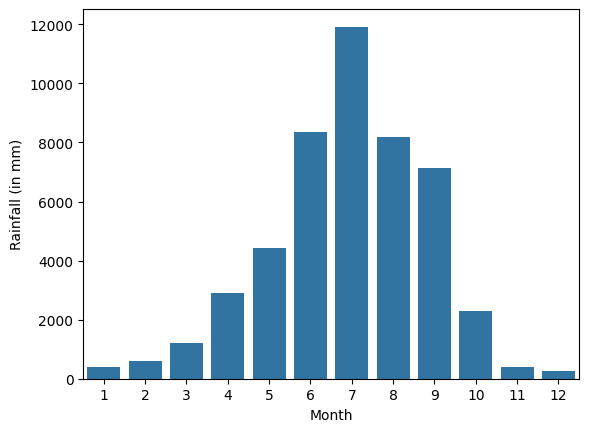

In [17]:
# checking which month has the highest rainfall for location 0
monthly_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().reset_index()

# Plotting the total rainfall for each month
sns.barplot(x='Month', y='Rainfall (in mm)', data=monthly_rainfall)

**We can see that location 0 experience most rainfall in 8th month i.e august**

In [18]:
monthly_rainfall

,Month,Rainfall (in mm)
0,1,385
1,2,604
2,3,1214
3,4,2890
4,5,4429
5,6,8367
6,7,11920
7,8,8188
8,9,7145
9,10,2278


In [19]:
most_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().max()
most_rainfall

np.int64(11920)

In [20]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,0,385
1,1,1,406
2,1,2,761
3,1,3,327
4,1,4,791
...,...,...,...
127,12,6,443
128,12,7,516
129,12,8,529
130,12,9,513


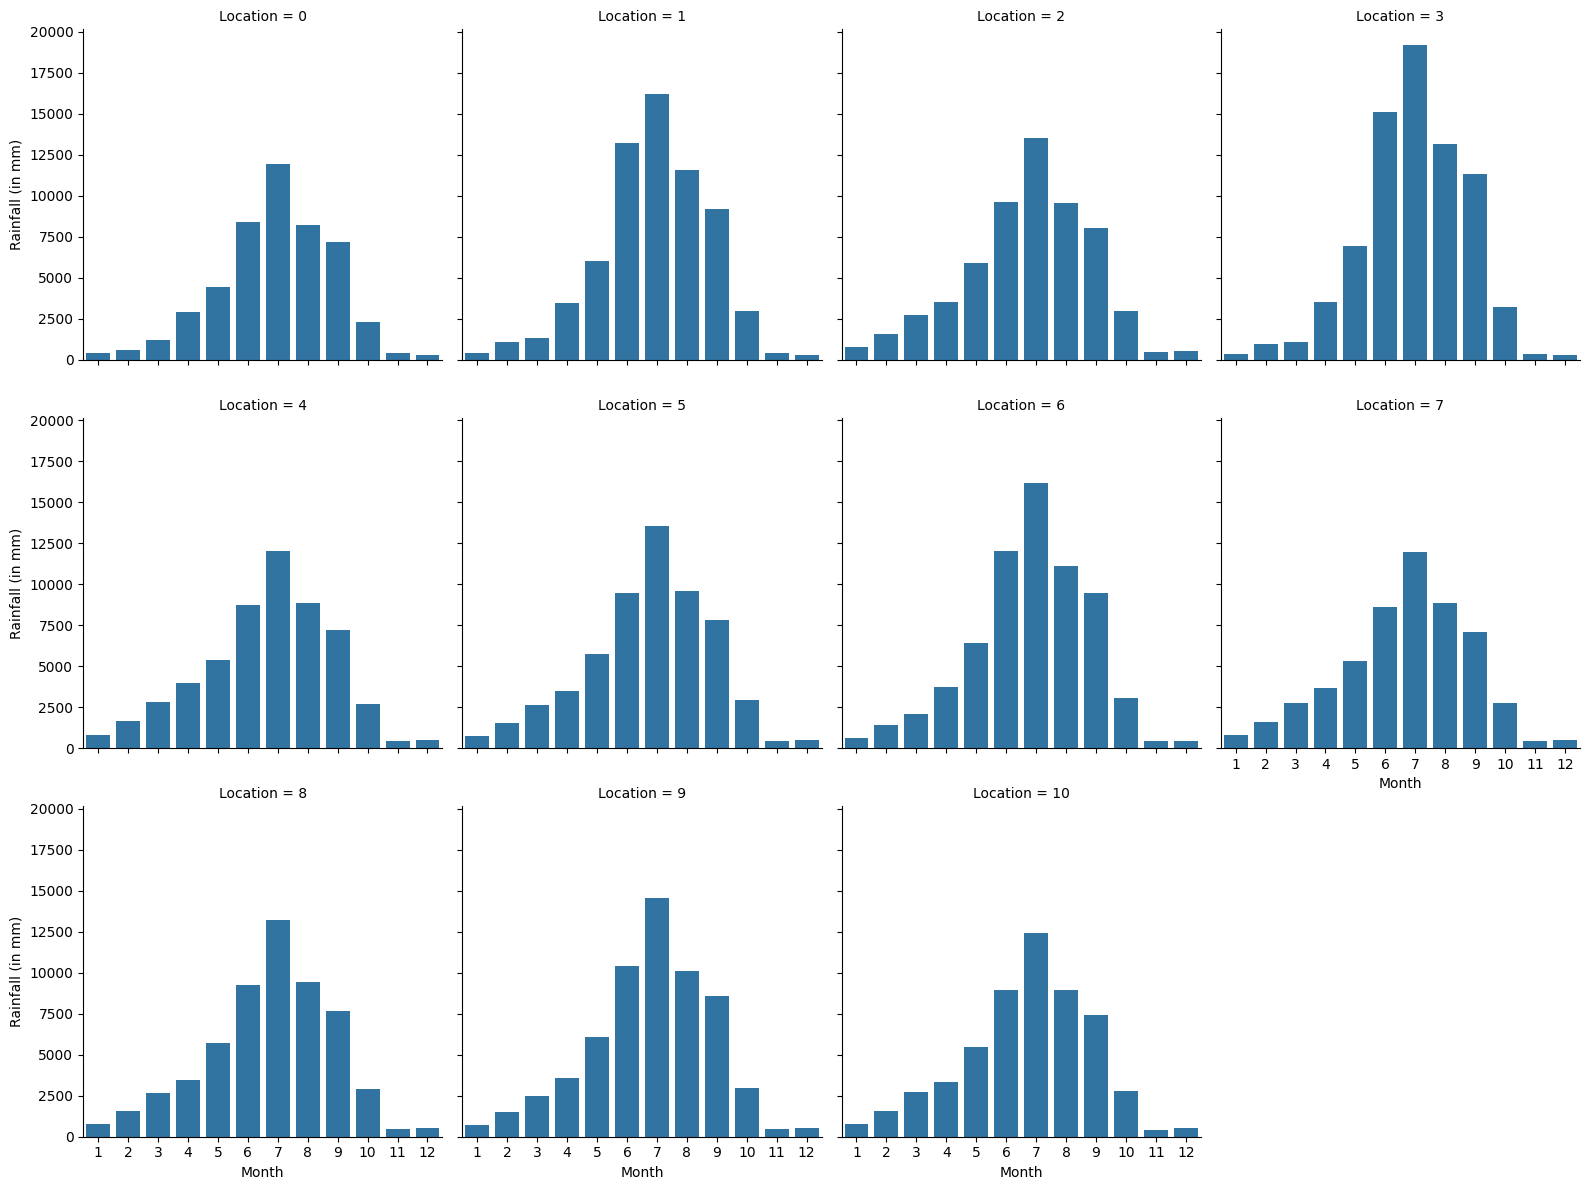

In [21]:
g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

**We can see that all 11 locations experience highest rainfalls in the months of june, july, august**